### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

**Independent Variable** -- Congruency

**Dependent Variable** -- Reading Time

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$H_0$: Mean reading time is the same regardless of congruency

$H_0$: Mean reading time is not the same regardless of congruency

Paired t-test

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


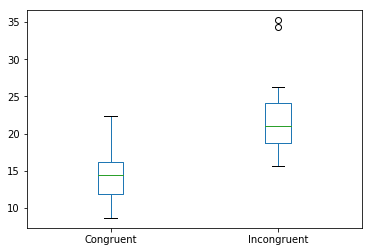

In [4]:
from matplotlib import pyplot as plt
df.plot(kind='box')
plt.show()

In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [7]:
from scipy import stats
stats.ttest_rel(df.Congruent, df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [15]:
# Now let's do this using bootstrapping

diffs = []
for _ in range(10000):
    boot_sample = df.sample(len(df), replace=True)
    congruent_mean = boot_sample.Congruent.mean()
    incongruent_mean = boot_sample.Incongruent.mean()
    diffs.append(incongruent_mean - congruent_mean)    

(array([  1.60000000e+01,   2.29000000e+02,   1.22000000e+03,
          2.88000000e+03,   3.20000000e+03,   1.74100000e+03,
          5.60000000e+02,   1.26000000e+02,   2.60000000e+01,
          2.00000000e+00]),
 array([  4.47929167,   5.30325417,   6.12721667,   6.95117917,
          7.77514167,   8.59910417,   9.42306667,  10.24702917,
         11.07099167,  11.89495417,  12.71891667]),
 <a list of 10 Patch objects>)

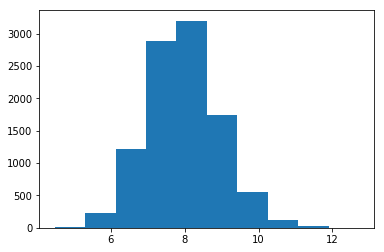

In [16]:
plt.hist(diffs)

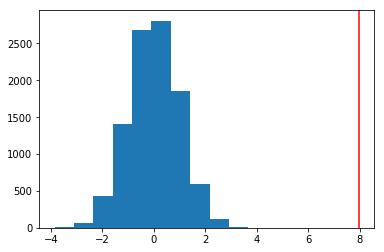

In [25]:
import numpy as np
diffs = np.array(diffs)

null_vals = np.random.normal(0, np.std(diffs), 10000)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [26]:
obs_diff = df.Incongruent.mean() - df.Congruent.mean()
(null_vals >= diff_actual).mean()

0.0